                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk          

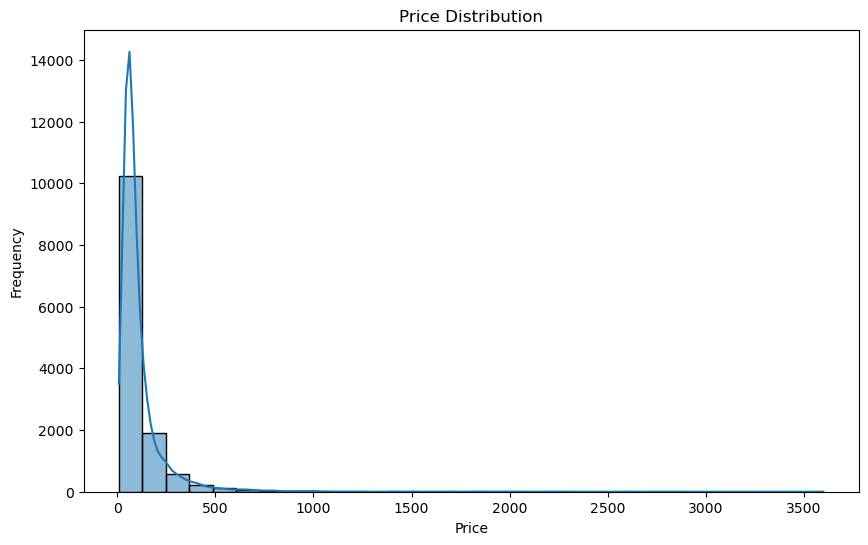

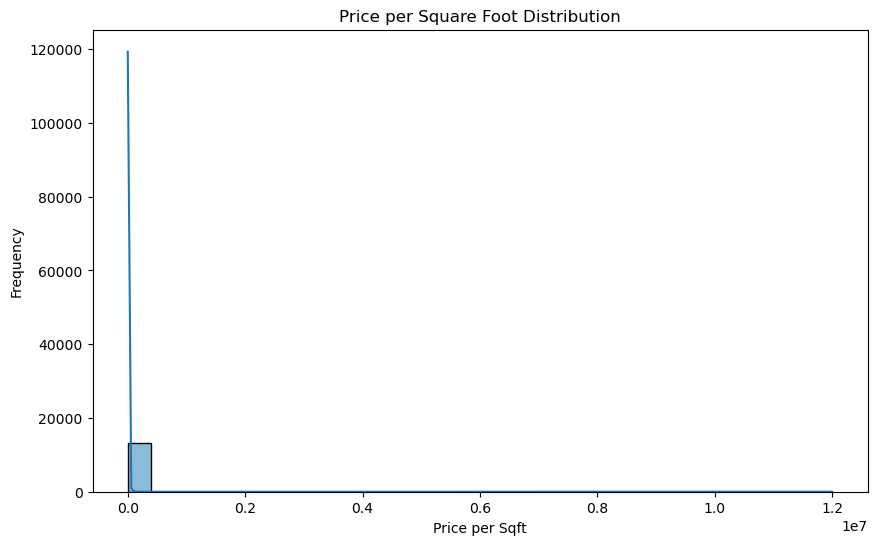

Mean Price: 112.27617765151514
Median Price: 71.85
Standard Deviation of Price: 149.17599517809657
Mean Price per Sqft: 7920.336742424242
Median Price per Sqft: 5438.0
Standard Deviation of Price per Sqft: 106727.16032810845


In [58]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'D:\Downloads\house_price.csv'  

df = pd.read_csv(file_path)


df.head()


print(df.head())  # Displays first few rows
print(df.info())  # Displays column data types and missing values
print(df.describe())  # Summary statistics for numerical columns

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)


if 'price' in df.columns and 'area' in df.columns:
    df['price_per_sqft'] = df['price'] / df['area']
else:
    print("The dataset does not contain 'price' or 'area' columns.")

#Visualizations

#Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Price per Square Foot Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title('Price per Square Foot Distribution')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()



# Statistical Measures (mean, median, mode, standard deviation)
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()

mean_price_sqft = df['price_per_sqft'].mean()
median_price_sqft = df['price_per_sqft'].median()
std_price_sqft = df['price_per_sqft'].std()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation of Price: {std_price}")
print(f"Mean Price per Sqft: {mean_price_sqft}")
print(f"Median Price per Sqft: {median_price_sqft}")
print(f"Standard Deviation of Price per Sqft: {std_price_sqft}")


In [64]:
import numpy as np


mean = df['price'].mean()
std_dev = df['price'].std()


upper_limit = mean + 3 * std_dev
lower_limit = mean - 3 * std_dev


df_trimmed = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]


df['price'] = np.where(df['price'] > upper_limit, upper_limit, df['price'])
df['price'] = np.where(df['price'] < lower_limit, lower_limit, df['price'])

print(f"Shape after trimming: {df_trimmed.shape}")

# percentiles for 'price'
lower_percentile = np.percentile(df['price'], 1)
upper_percentile = np.percentile(df['price'], 99)

df_trimmed_percentile = df[(df['price'] >= lower_percentile) & (df['price'] <= upper_percentile)]


df['price'] = np.where(df['price'] > upper_percentile, upper_percentile, df['price'])
df['price'] = np.where(df['price'] < lower_percentile, lower_percentile, df['price'])

print(f"Shape after trimming using percentiles: {df_trimmed_percentile.shape}")

# Calculate the first (Q1) and third quartiles (Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_trimmed_iqr = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])

print(f"Shape after trimming using IQR: {df_trimmed_iqr.shape}")

Shape after trimming: (12701, 7)
Shape after trimming using percentiles: (13200, 7)
Shape after trimming using IQR: (11950, 7)


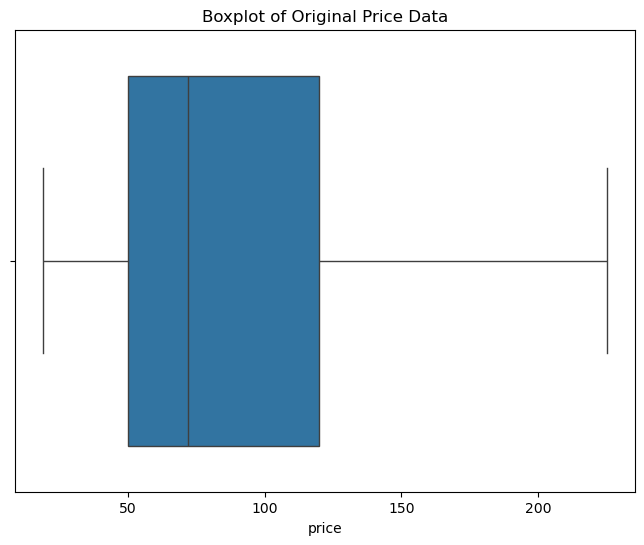

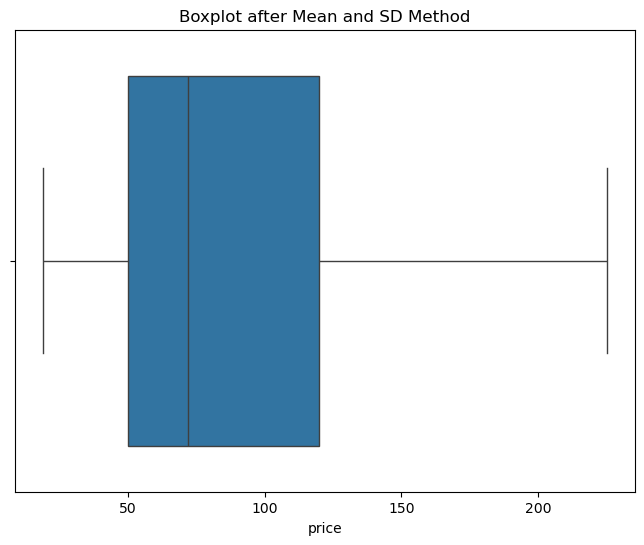

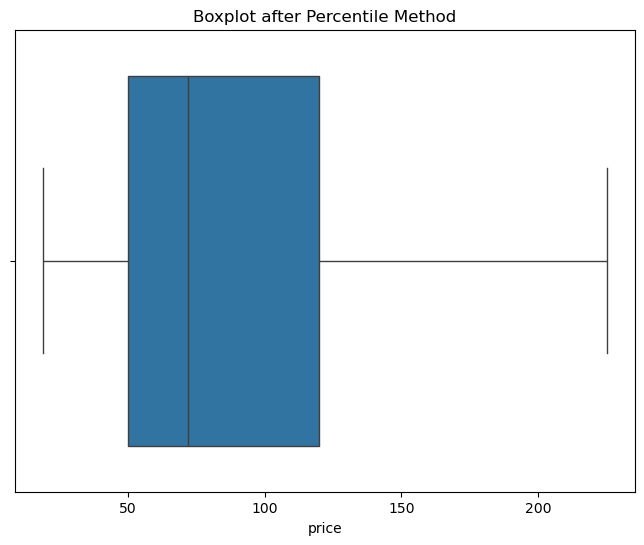

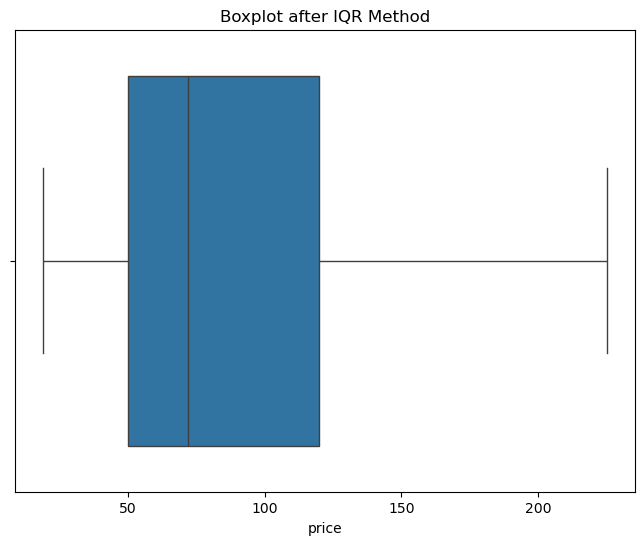

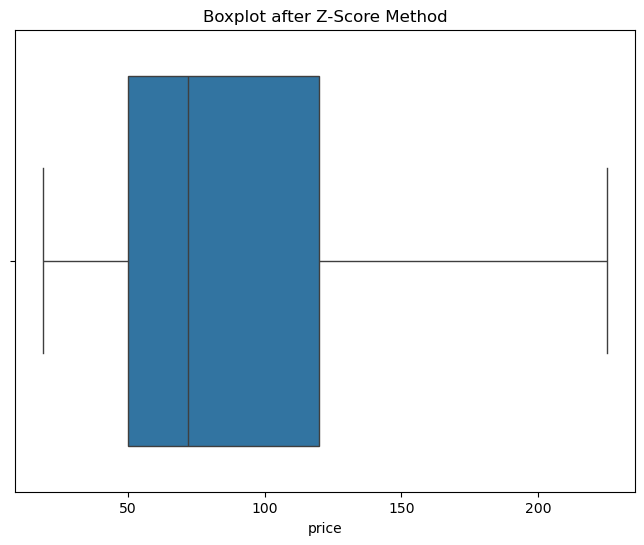

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Assuming 'df' is your dataframe and 'price' is the column of interest
# Boxplot for Original Data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Original Price Data')
plt.show()

# 1. Mean and Standard Deviation Method
mean = df['price'].mean()
std_dev = df['price'].std()
upper_limit = mean + 3 * std_dev
lower_limit = mean - 3 * std_dev
df_mean_sd = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

# Boxplot after Mean and Standard Deviation Method
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_mean_sd['price'])
plt.title('Boxplot after Mean and SD Method')
plt.show()

# 2. Percentile Method
lower_percentile = np.percentile(df['price'], 1)
upper_percentile = np.percentile(df['price'], 99)
df_percentile = df[(df['price'] >= lower_percentile) & (df['price'] <= upper_percentile)]

# Boxplot after Percentile Method
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_percentile['price'])
plt.title('Boxplot after Percentile Method')
plt.show()

# 3. IQR Method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_iqr = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Boxplot after IQR Method
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_iqr['price'])
plt.title('Boxplot after IQR Method')
plt.show()

# 4. Z-Score Method
df['z_score'] = zscore(df['price'])
df_zscore = df[df['z_score'].abs() <= 3]

# Boxplot after Z-Score Method
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_zscore['price'])
plt.title('Boxplot after Z-Score Method')
plt.show()

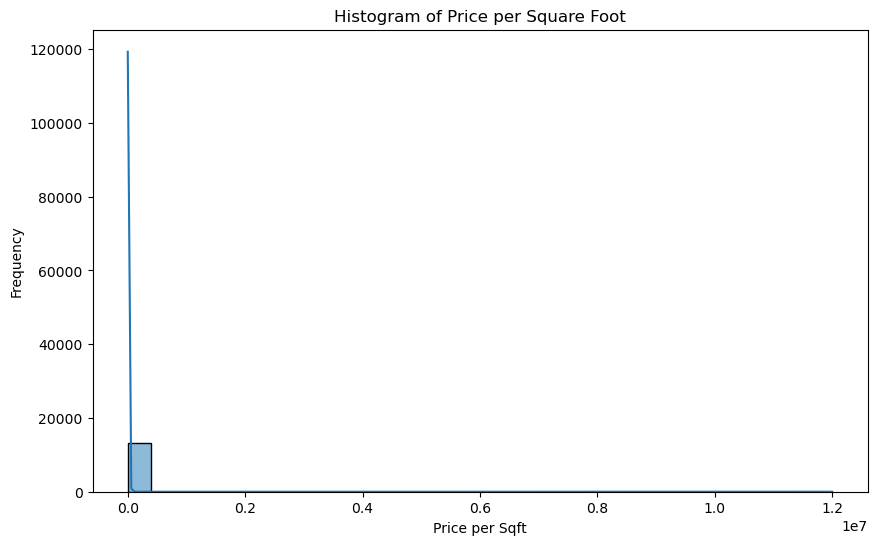

Original Skewness: 108.26875024325159
Original Kurtosis: 12090.633538860382
Data is skewed, applying transformation.


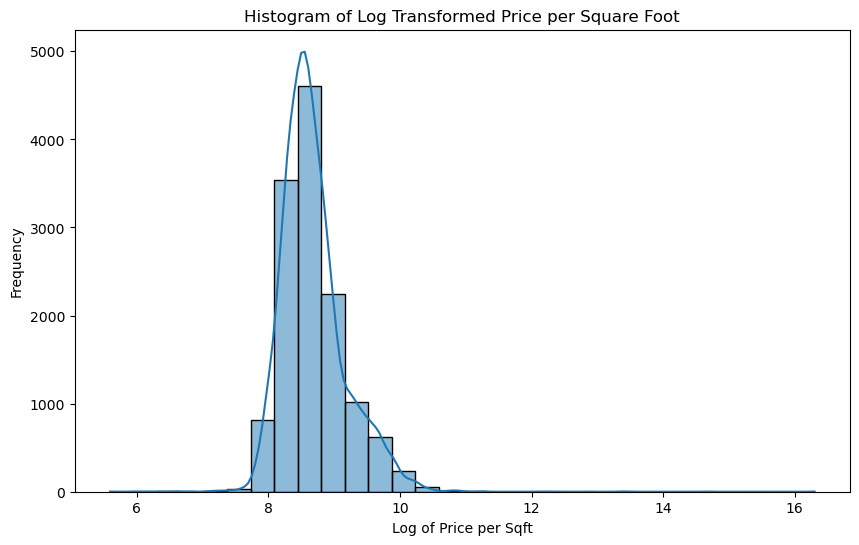

Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats

# Assuming 'df' is your dataframe and 'price_per_sqft' is the column of interest

# Step 1: Plot histogram for price per square foot to check normality
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title('Histogram of Price per Square Foot')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

# Step 2: Calculate Skewness and Kurtosis before transformation
original_skewness = skew(df['price_per_sqft'], nan_policy='omit')
original_kurtosis = kurtosis(df['price_per_sqft'], nan_policy='omit')

print(f"Original Skewness: {original_skewness}")
print(f"Original Kurtosis: {original_kurtosis}")

# Step 3: Check if transformation is needed based on skewness
if original_skewness > 0.5 or original_skewness < -0.5:
    print("Data is skewed, applying transformation.")
    
    # Apply log transformation if the data is positive
    df['log_price_per_sqft'] = np.log(df['price_per_sqft'] + 1)  # Adding 1 to avoid log(0)

    # Alternatively, you could try square root or Box-Cox transformation based on the data.

    # Step 4: Plot histogram after transformation
    plt.figure(figsize=(10, 6))
    sns.histplot(df['log_price_per_sqft'], kde=True, bins=30)
    plt.title('Histogram of Log Transformed Price per Square Foot')
    plt.xlabel('Log of Price per Sqft')
    plt.ylabel('Frequency')
    plt.show()

    # Step 5: Calculate Skewness and Kurtosis after transformation
    transformed_skewness = skew(df['log_price_per_sqft'], nan_policy='omit')
    transformed_kurtosis = kurtosis(df['log_price_per_sqft'], nan_policy='omit')

    print(f"Transformed Skewness: {transformed_skewness}")
    print(f"Transformed Kurtosis: {transformed_kurtosis}")

else:
    print("Data is not skewed, no transformation needed.")

<Axes: >

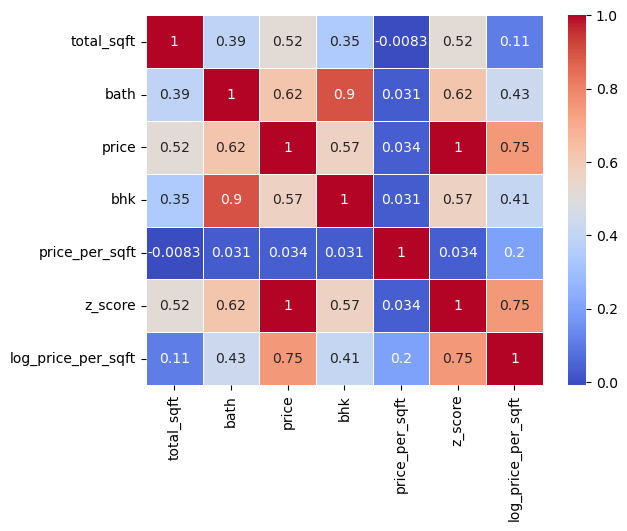

In [82]:
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price_per_sqft', y='area')  # Replace 'area' with any other column of interest
plt.title('Scatter Plot between Price per Sqft and Area')
plt.xlabel('Price per Sqft')
plt.ylabel('Area')
plt.show()